###BIP TEST

1. Write a function that finds the contiguous subarray (containing at least one number) which has the largest sum within an array read in input to the function. The function should return the sub-array and the corresponding sum. 
2. Which is the complexity of your solution? 
3. Can you do a solution with linear complexity? 
4. Write a unit test for the function.








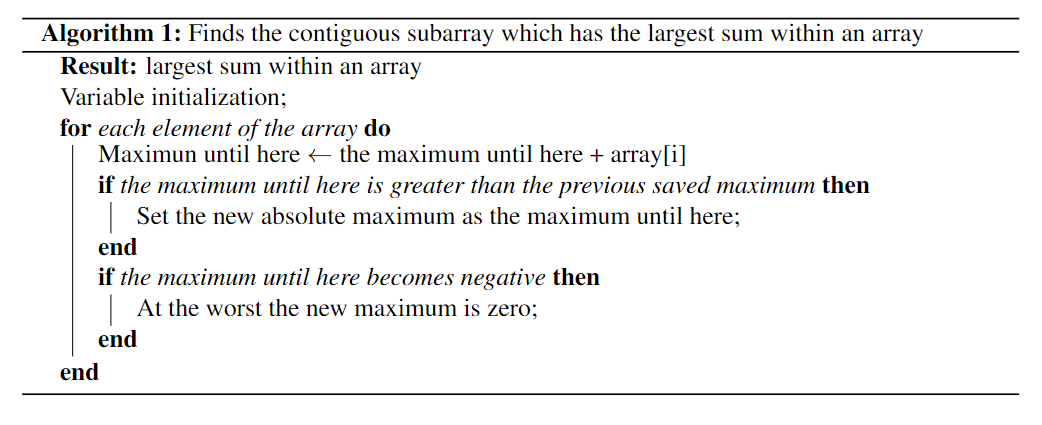

In [110]:
import timeit
from functools import partial
from sys import maxsize
import numpy as np
from matplotlib import pyplot

In [182]:
def largestSumSubArray(array):
    dim = len(array)
    if dim==0:
      raise ValueError('Empty array')

    maxAbsolute = -maxsize - 1  # largest value a variable of data type Py_ssize_t can store. Depends on the Python platform
    maxUntilHere = 0
    index_start = 0
    index_end = 0
    restart = 0

    for index, elem in enumerate(array):
        maxUntilHere = maxUntilHere+elem

        if maxAbsolute < maxUntilHere:
          maxAbsolute = maxUntilHere
          index_start = restart
          index_end = index

        if maxUntilHere < 0:
          maxUntilHere = 0
          restart = index + 1
    
    result = array[index_start:index_end+1]

    return result, maxAbsolute

In [201]:
array = np.random.randint(-10,10,10)

In [202]:
array

array([ 8,  1,  6,  5, -2,  3, -6,  9,  0,  0])

In [203]:
result, sum = largestSumSubArray(array)

In [204]:
result

array([ 8,  1,  6,  5, -2,  3, -6,  9])

In [205]:
sum

24

In [ ]:
array=[]
result, sum = largestSumSubArray(array)

#Time complexity computation

The runtime of the algorithm grows almost linearly with the input size becouse the function uses a single iteration over the entire array and the operations inside every iteration (comparisons) have complexity O(1).

In [206]:
def plotTimeComplexity(func, minNumTest, maxNumTest, incr, nTests):
    x = []
    y = []
    for i in range(minNumTest, maxNumTest, incr):
        N = np.random.randint(-1000,1000,i)
        testNTimer = timeit.Timer(partial(func, N))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    pyplot.plot(x, y, "o")
    pyplot.xlabel("Number of array element")
    pyplot.ylabel("Time computation")
    pyplot.show()

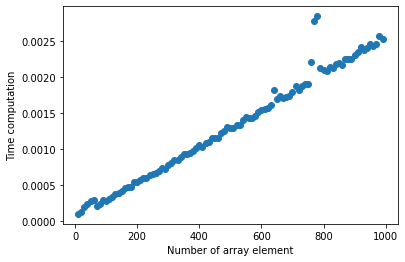

In [211]:
plotTimeComplexity(largestSumSubArray, 10, 1000, 10, 10)

#Unit Test

In [212]:
import unittest

In [214]:
class Function:
  def __init__(self):
        pass

  def largestSumSubArray(self,array):
      dim = len(array)

      if dim==0:
        raise ValueError('Empty array')

      maxAbsolute = -10000
      maxUntilHere = 0
      index_start = 0
      index_end = 0
      restart = 0

      for index,elem in enumerate(array):
          maxUntilHere = maxUntilHere+elem

          if maxAbsolute < maxUntilHere:
            maxAbsolute = maxUntilHere
            index_start = restart
            index_end = index

          if maxUntilHere < 0:
            maxUntilHere = 0
            restart = index + 1

      return maxAbsolute

In [215]:
class TestLargestSumSubArray(unittest.TestCase):
    def test_largestSumSubArray(self):
      self.calc = Function()

      ##all zeros
      self.assertEqual(self.calc.largestSumSubArray(np.zeros(10)), 0)

      ##positive and negative
      self.assertEqual(self.calc.largestSumSubArray(np.array([5, 0, 8,10, 7, -1, -6, -8, -10, -3])), 30)

      ##all positives
      self.assertEqual(self.calc.largestSumSubArray(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])), 55)

      ##all negatives
      self.assertEqual(self.calc.largestSumSubArray(np.array([-9, -2, -4, -1, -9, -10, -4, -6, -3, -1])), -1)

      ##entire with negative in the middle
      self.assertEqual(self.calc.largestSumSubArray(np.array([10, -1, -1, -1, -1, -1, -1, -1, -1, 10])), 12)

      ##all negatives after big positive
      self.assertEqual(self.calc.largestSumSubArray(np.array([10, -1, -1, -1, -1, -1, -1, -1, -1, -1])), 10)

In [216]:
unittest.main(argv=[''], defaultTest='TestLargestSumSubArray', verbosity=2, exit=False)

test_largestSumSubArray (__main__.TestLargestSumSubArray) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK
